### Importing the Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__ 

'2.15.0'

### Part 1 - Data Preprocessing

#### Generating images for the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#### Generating images for the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [5]:
training_set = train_datagen.flow_from_directory('C:/Users/ashis/Desktop/ASHISH/PROJECTS/Major Project/Phase 2/Code/dataSet/trainingData',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 12845 images belonging to 27 classes.


In [6]:
test_set = test_datagen.flow_from_directory('C:/Users/ashis/Desktop/ASHISH/PROJECTS/Major Project/Phase 2/Code/dataSet/testingData',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 4268 images belonging to 27 classes.


In [7]:
type(test_set)

keras.src.preprocessing.image.DirectoryIterator

### Part 2 - Building the CNN

#### Initializing the CNN

In [8]:
classifier = tf.keras.models.Sequential()

#### Step 1 - Convolution

In [9]:
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

#### Step 2 - Pooling

In [10]:
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Adding a second convolutional layer

In [11]:
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Step 3 - Flattening

In [12]:
classifier.add(tf.keras.layers.Flatten())

#### Step 4 - Full Connection

In [13]:
classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax')) # softmax for more than 2

### Part 3 - Training the CNN

#### Compiling the CNN

In [14]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [16]:
type(classifier)

keras.src.engine.sequential.Sequential

In [20]:
history = classifier.fit(training_set,
                  epochs = 5,
                  validation_data = test_set)

Epoch 1/5
1285/1285 [==============================] - 158s 123ms/step - loss: 1.1818 - accuracy: 0.5971 - val_loss: 0.2031 - val_accuracy: 0.9470
Epoch 2/5
1285/1285 [==============================] - 121s 94ms/step - loss: 0.6594 - accuracy: 0.7705 - val_loss: 0.0702 - val_accuracy: 0.9815
Epoch 3/5
1285/1285 [==============================] - 93s 72ms/step - loss: 0.4805 - accuracy: 0.8376 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 4/5
1285/1285 [==============================] - 83s 65ms/step - loss: 0.3815 - accuracy: 0.8749 - val_loss: 0.0256 - val_accuracy: 0.9930
Epoch 5/5
1285/1285 [==============================] - 109s 85ms/step - loss: 0.3060 - accuracy: 0.8989 - val_loss: 0.0105 - val_accuracy: 0.9979


#### Plotting Loss

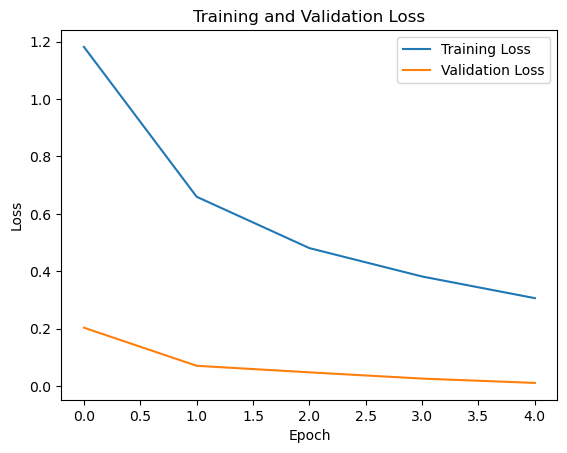

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Saving the Model

In [23]:
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model.h5')
print('Weights saved')

Model Saved
Weights saved
